In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Grab the Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
               'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

## Examining the Data

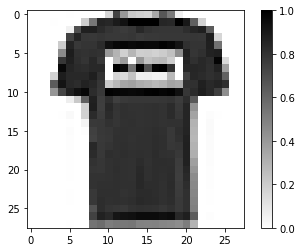

In [18]:
plt.figure()
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.colorbar()

In [13]:
highest_value = np.max(train_images[1])
highest_value

255

### Scaling values

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

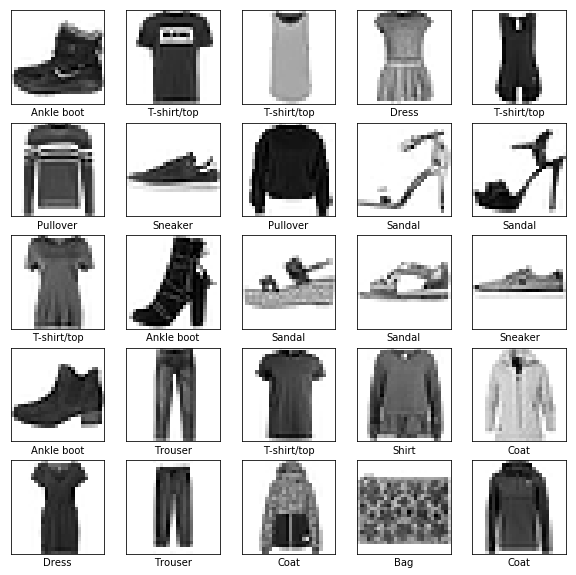

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the Model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Flattens our 28x28 images into (1,784)
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.5012 - acc: 0.8225
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3738 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3394 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3131 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.2950 - acc: 0.8902


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/step
Test accuracy: 0.8686


## Examining Results

In [27]:
predictions = model.predict(test_images)
predictions[0]

array([2.0593208e-05, 1.3757600e-05, 7.0339893e-06, 8.3785466e-07,
       2.2785169e-05, 1.7761262e-02, 1.2063710e-05, 3.4452260e-01,
       5.3440799e-05, 6.3758570e-01], dtype=float32)

In [29]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

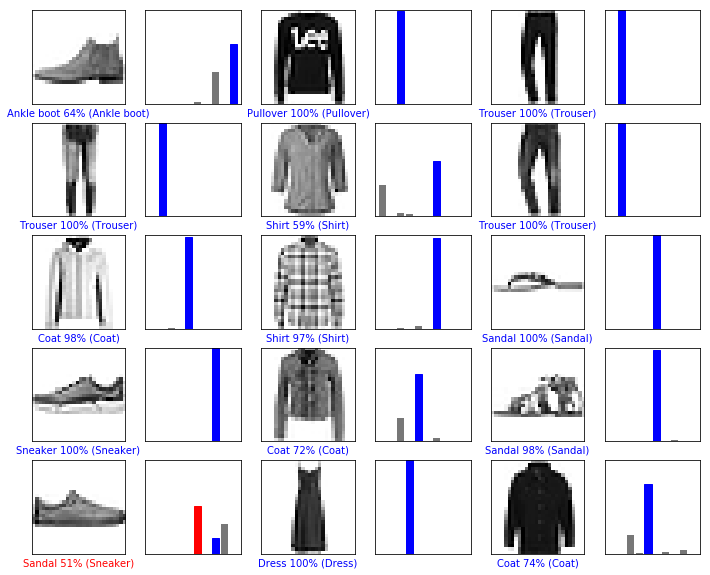

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

## Use the trained model to make a prediction about a single image.
`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [38]:
# Add the image to a batch where it's the only member.
img = test_images[0]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)

print(predictions_single)

[[2.0593201e-05 1.3757595e-05 7.0339934e-06 8.3785437e-07 2.2785141e-05
  1.7761253e-02 1.2063706e-05 3.4452271e-01 5.3440785e-05 6.3758552e-01]]


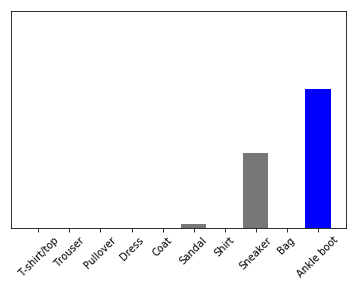

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)